## Clustering Assignment 

### Read and Visualise the Data Set

In [238]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [239]:
# Read the data set 

ngo_df = pd.read_csv(r'C:\Users\Prasanna\Desktop\clustering assignment\Country-data.csv')
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [240]:
ngo_df.shape

(167, 10)

In [241]:
# Check for Null Values 

ngo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### According to above info , there is no missing values in data frame 
still we check null values exist or not

In [242]:
round(100*(ngo_df.isnull().sum())/(len(ngo_df)))

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [243]:
#EDA (Univariate and bi variate)

In [244]:

col = ['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

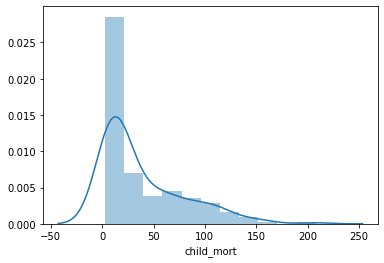

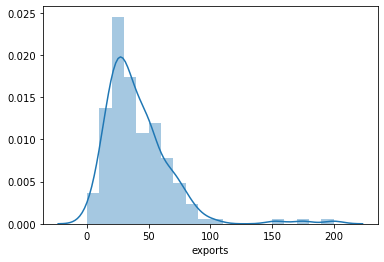

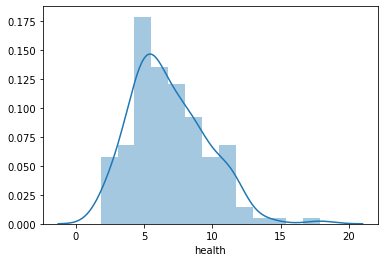

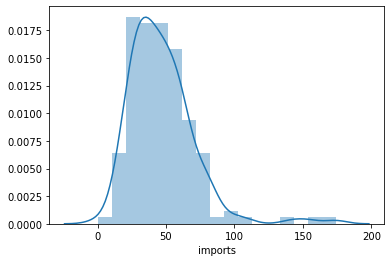

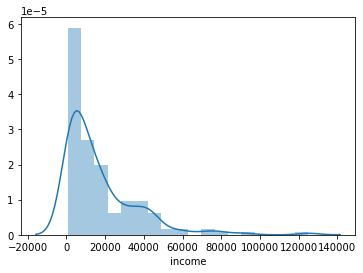

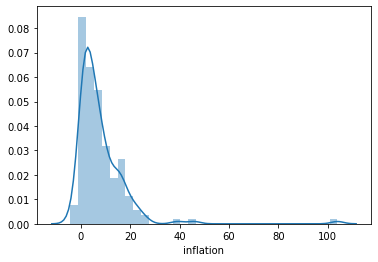

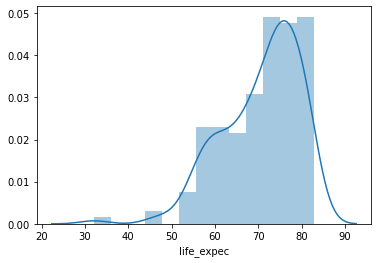

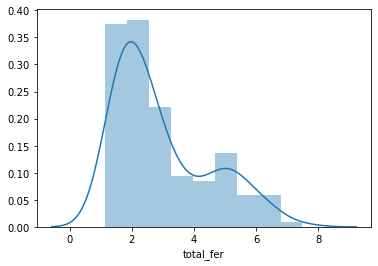

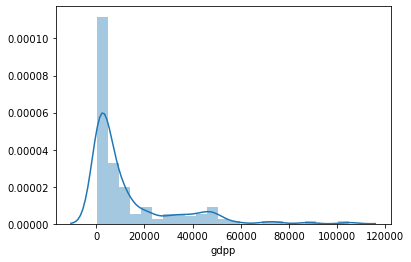

In [245]:
for c in col:
    sns.distplot(ngo_df[c])
    plt.show()
    

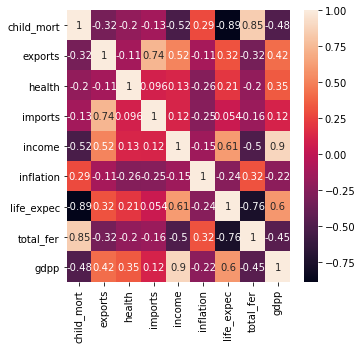

In [246]:
plt.figure(figsize=(5,5))
sns.heatmap(ngo_df[col].corr(), annot=True);

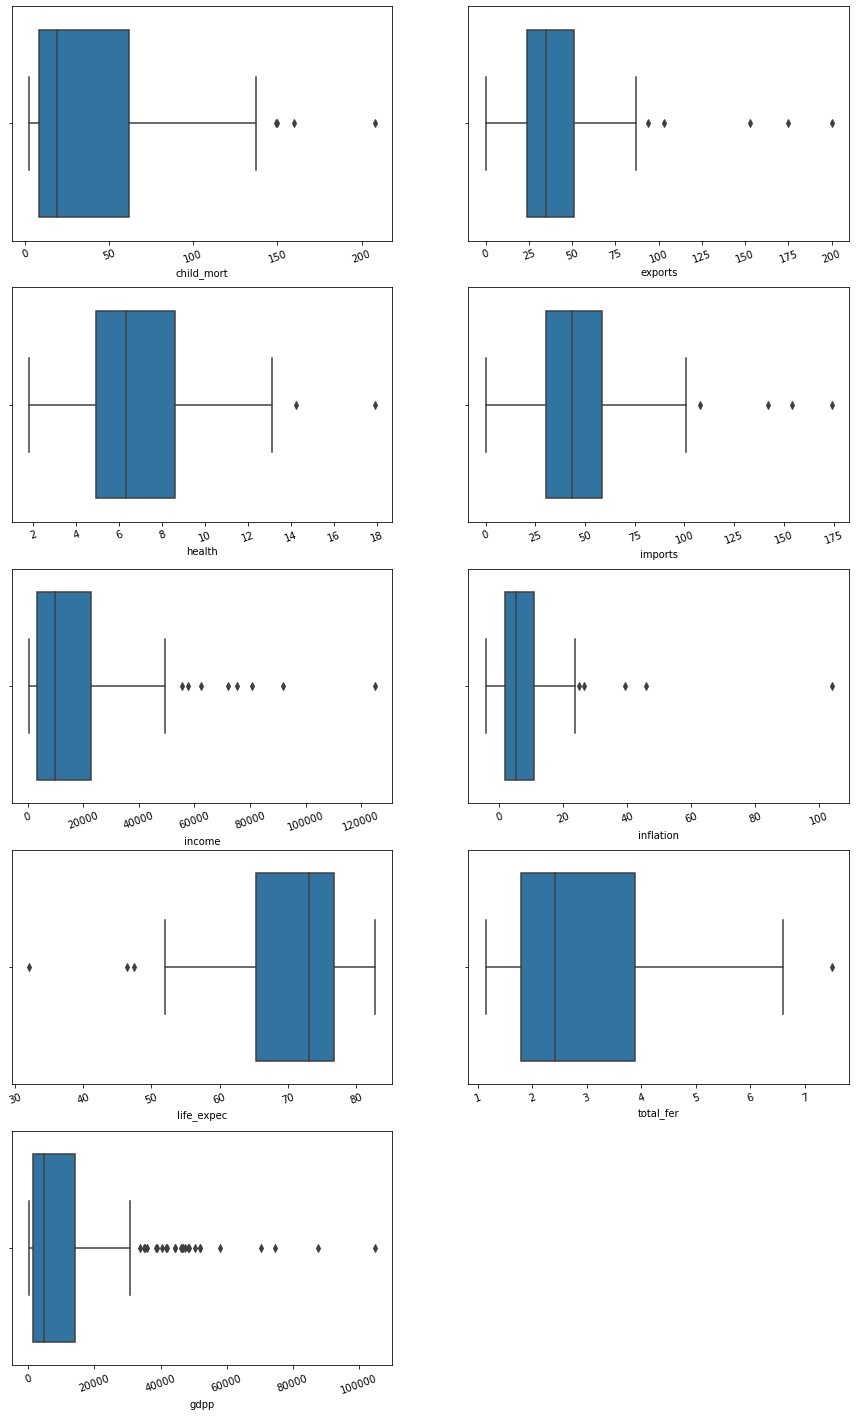

In [247]:
# Outlier Treatment using box plot 
plt.figure(figsize=(15,25))
col = ['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']
for i in enumerate(col): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(ngo_df[i[1]])
    plt.xticks(rotation = 20)

### As we are going to target economically weak country so Upper outlier dont have any effect for analysis , So we can remove outliers

In [248]:

def outlier_treatment(ngo_df, col):
    Q1 = ngo_df[col].quantile(0.25)
    Q3 = ngo_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1-1.5*IQR
    higher_cap = Q3+1.5*IQR
    ngo_df.loc[(ngo_df[col] > higher_cap), col] = higher_cap
    ngo_df.loc[(ngo_df[col] < lower_cap), col] = lower_cap
    return ngo_df


In [249]:


ngo_df = outlier_treatment(ngo_df, 'child_mort')
ngo_df = outlier_treatment(ngo_df, 'exports')
ngo_df = outlier_treatment(ngo_df, 'health')
ngo_df = outlier_treatment(ngo_df, 'imports')
ngo_df = outlier_treatment(ngo_df, 'income')
ngo_df = outlier_treatment(ngo_df, 'inflation')
ngo_df = outlier_treatment(ngo_df, 'life_expec')
ngo_df = outlier_treatment(ngo_df, 'total_fer')
ngo_df = outlier_treatment(ngo_df, 'gdpp')

ngo_df.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,39.543557,6.792575,45.862071,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,38.443293,21.301318,2.668103,20.338815,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,142.875000,92.675000,14.120000,101.575000,51967.500000,24.160000,82.800000,7.007500,33130.000000


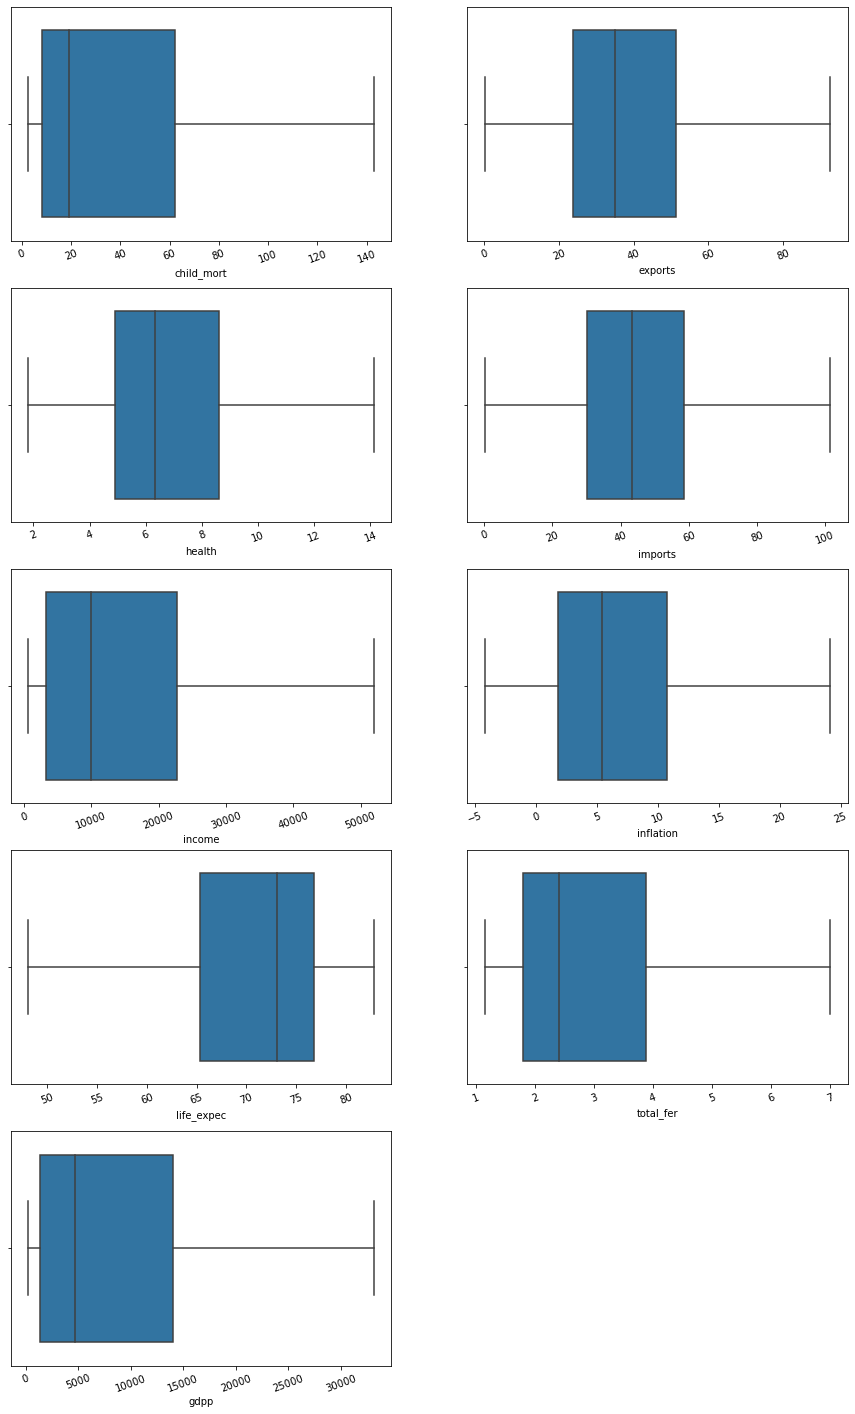

In [250]:
# Again Check for the outliet

plt.figure(figsize=(15,25))
col = ['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']
for i in enumerate(col): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(ngo_df[i[1]])
    plt.xticks(rotation = 20)

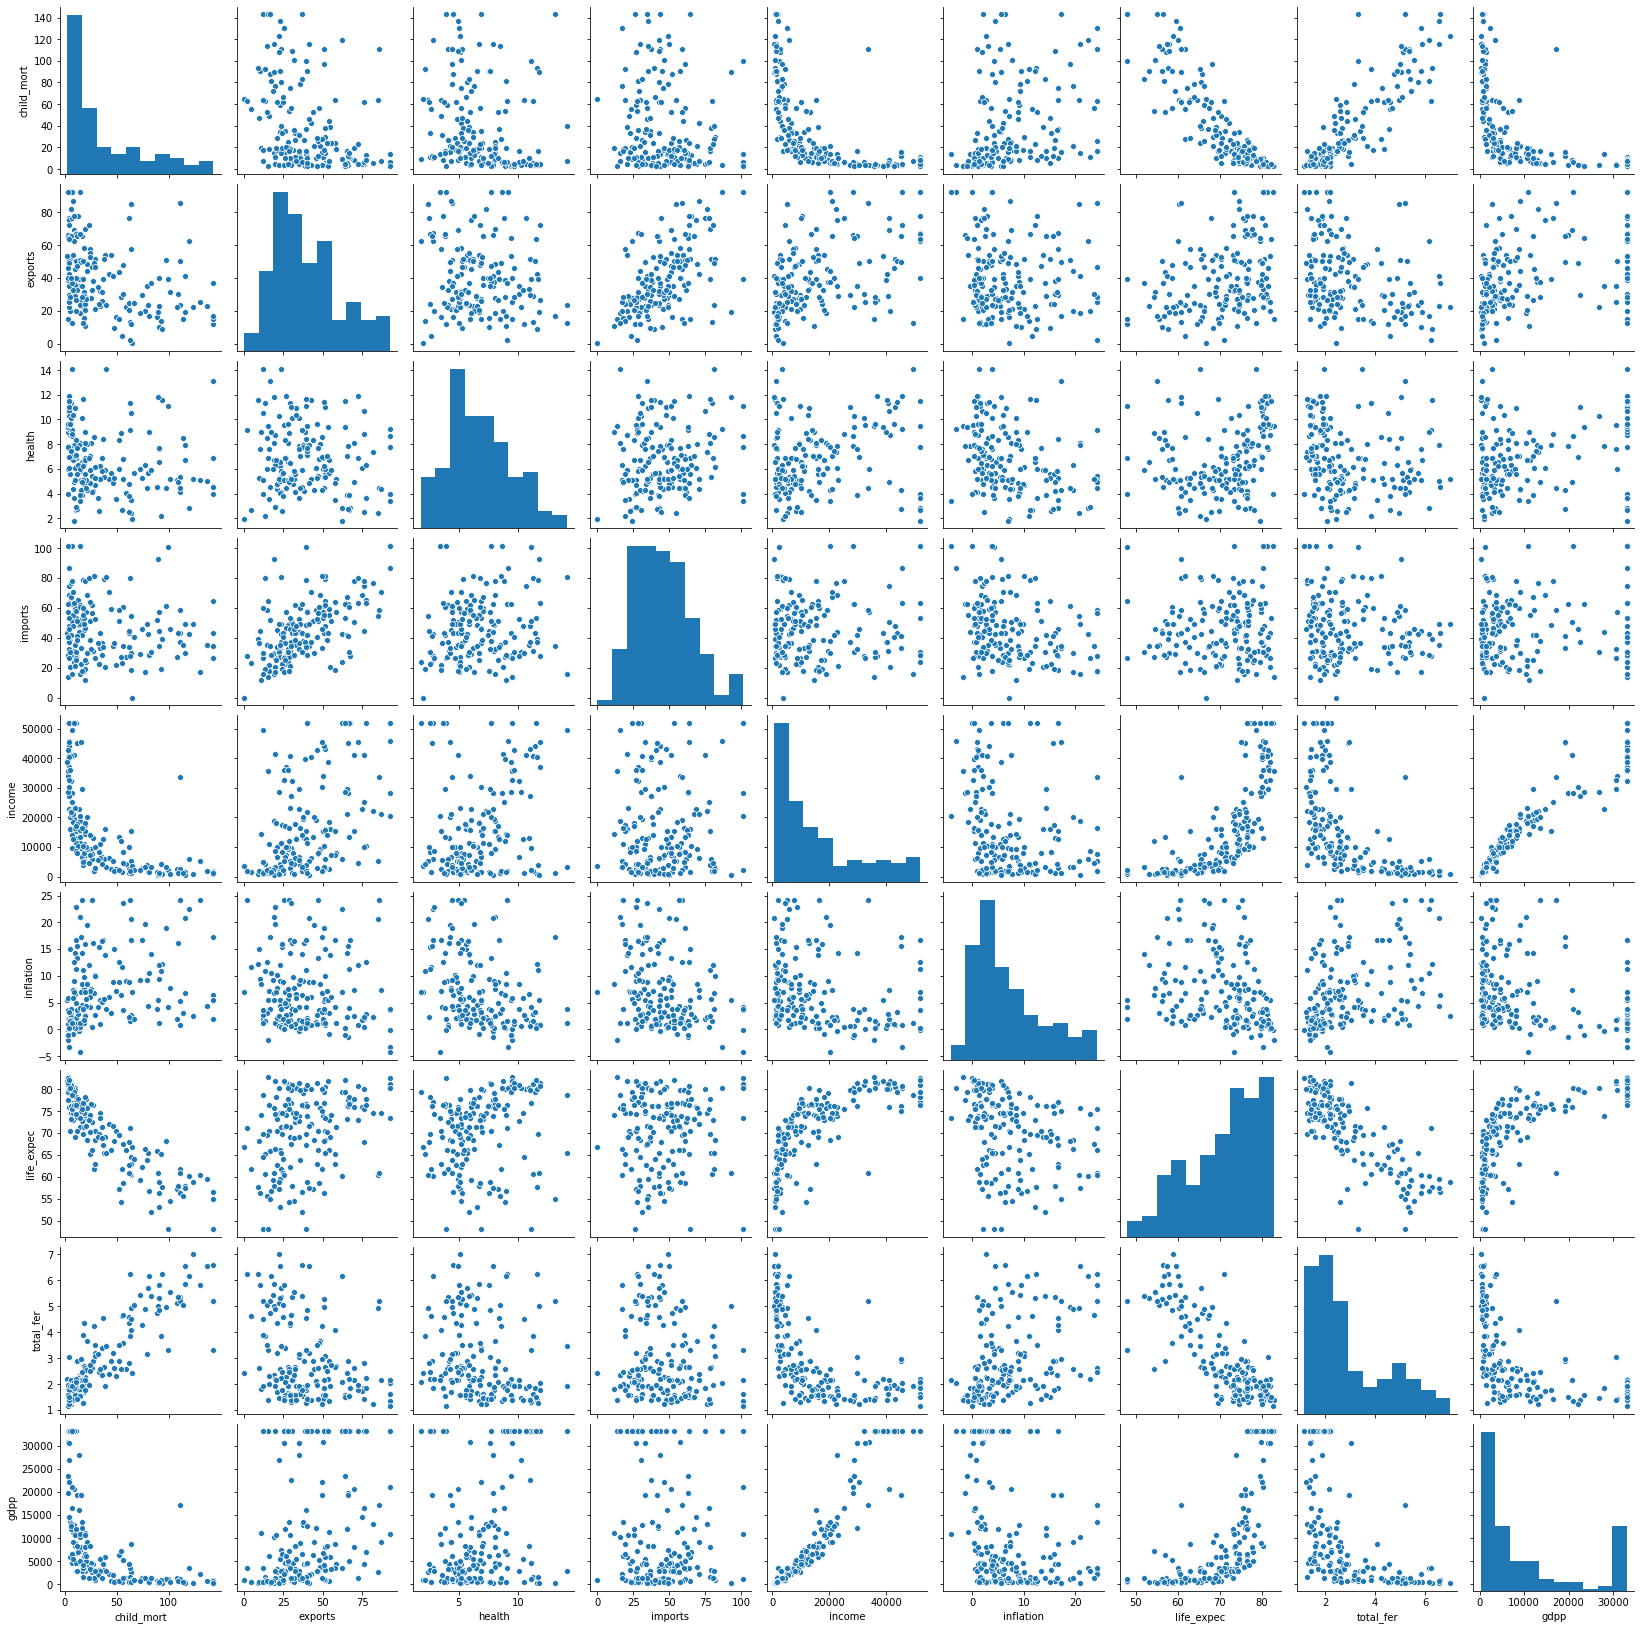

In [251]:
sns.pairplot(ngo_df)
plt.show()

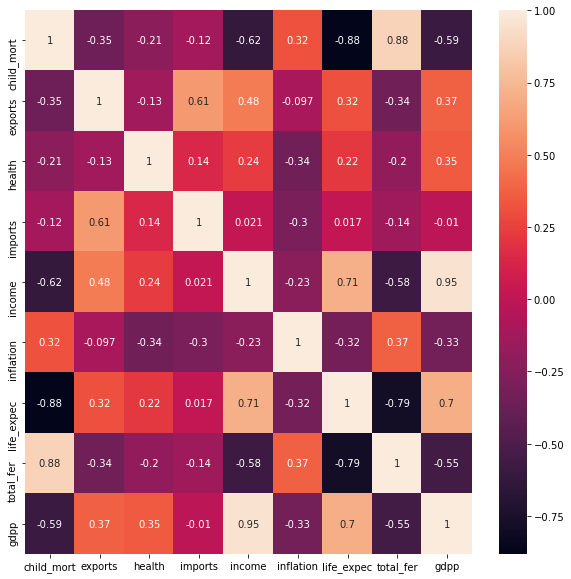

In [252]:
plt.figure(figsize=(10,10))
sns.heatmap(ngo_df[col].corr(), annot=True);

# Clustering
## Hopkins Test

In [253]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [254]:
hopkins(ngo_df.drop('country', axis = 1))

0.9085534842470103

### Given Data is Good for clustering 

# Scaling Data 

In [255]:
df1 =ngo_df.drop('country',axis=1)

In [256]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [257]:
standard_scaler = StandardScaler()
df1 = standard_scaler.fit_transform(df1)

## Now let us Find Optimal Value of Numner of Clusters

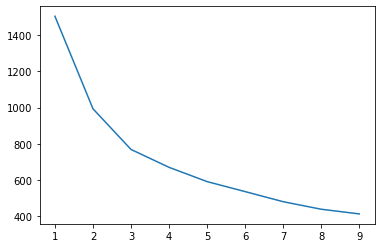

In [258]:

# Elbow Curve method

ssd = []
for i in list(range(1,10)):
    model = KMeans(n_clusters = i, max_iter = 50).fit(df1)
    ssd.append([i, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);



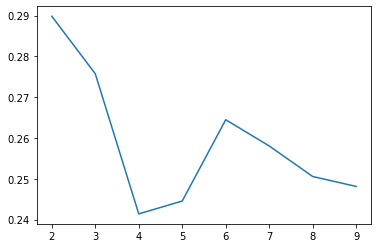

In [259]:

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
ss    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [260]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2898395153574449
For n_clusters=3, the silhouette score is 0.27574742652648093
For n_clusters=4, the silhouette score is 0.2434847032290599
For n_clusters=5, the silhouette score is 0.2590545255244237
For n_clusters=6, the silhouette score is 0.23406627817977163
For n_clusters=7, the silhouette score is 0.2655530547194299
For n_clusters=8, the silhouette score is 0.2403411320011817


### Optimal value of K is 4

In [261]:
kmeans = KMeans(n_clusters=4, max_iter=100 , random_state = 100)
kmeans.fit(df1)


KMeans(max_iter=100, n_clusters=4, random_state=100)

In [262]:
kmeans.labels_

array([3, 1, 2, 3, 1, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 3, 1, 2, 1, 1,
       2, 0, 1, 3, 3, 1, 3, 0, 1, 3, 3, 2, 2, 2, 3, 3, 3, 1, 3, 1, 0, 0,
       0, 2, 2, 2, 1, 3, 3, 1, 1, 0, 0, 2, 3, 1, 0, 3, 0, 1, 2, 3, 3, 1,
       3, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 3, 3, 0, 1, 3, 1, 1, 3,
       3, 2, 1, 0, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 2, 1, 1, 3, 2, 1, 2,
       0, 0, 3, 3, 0, 2, 3, 1, 1, 2, 2, 1, 0, 0, 1, 2, 3, 1, 2, 3, 1, 1,
       3, 0, 1, 0, 1, 3, 0, 0, 2, 1, 3, 1, 0, 0, 2, 3, 1, 3, 3, 1, 1, 2,
       1, 3, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 3])

In [263]:
# Keeping Original data Safe 
df_org = ngo_df.copy()

In [264]:

df_km = pd.concat([ngo_df, pd.Series(kmeans.labels_)], axis = 1)
df_km.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,3
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


In [265]:
df_km['cluster_id'].value_counts()

1    53
3    42
2    37
0    35
Name: cluster_id, dtype: int64

# K mean Clustering visualisation 

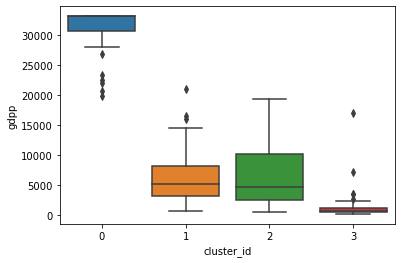

In [266]:
# Now we will see how gdpp,(child_mort and income ) are custered 
sns.boxplot(data=df_km,x = 'cluster_id',y='gdpp')
plt.show()

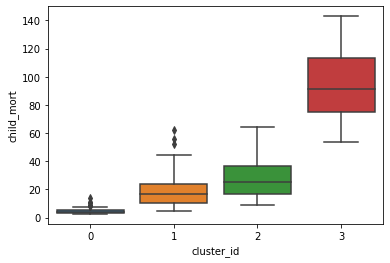

In [267]:
sns.boxplot(data=df_km,x = 'cluster_id',y='child_mort')
plt.show()

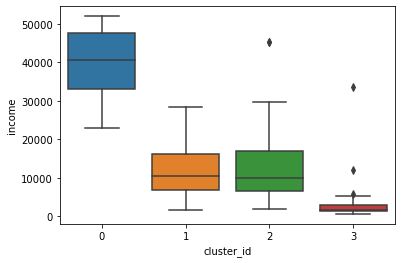

In [268]:
sns.boxplot(data=df_km,x = 'cluster_id',y='income')
plt.show()

## From above visualisation we can conclude that cluster 3 has very low income and GDPP growth and high in child mortality ,  So we can conclude that we should focus more on countries coming under cluster3

In [269]:
df_km[df_km['cluster_id']==3]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
113                     Nigeria
116     

In [270]:
top_kmeans = df_km[df_km['cluster_id']==3].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True])
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
132,Sierra Leone,142.875,16.8,13.10,34.5,1220.0,17.20,55.00,5.2000,399.0,3
31,Central African Republic,142.875,11.8,3.98,26.5,888.0,2.01,48.05,5.2100,446.0,3
66,Haiti,142.875,15.3,6.91,64.7,1500.0,5.45,48.05,3.3300,662.0,3
32,Chad,142.875,36.8,4.53,43.5,1930.0,6.39,56.50,6.5900,897.0,3
97,Mali,137.000,22.8,4.98,35.1,1870.0,4.37,59.50,6.5500,708.0,3
113,Nigeria,130.000,25.3,5.07,17.4,5150.0,24.16,60.50,5.8400,2330.0,3
112,Niger,123.000,22.2,5.16,49.1,814.0,2.55,58.80,7.0075,348.0,3
3,Angola,119.000,62.3,2.85,42.9,5900.0,22.40,60.10,6.1600,3530.0,3
37,"Congo, Dem. Rep.",116.000,41.1,7.91,49.6,609.0,20.80,57.50,6.5400,334.0,3
25,Burkina Faso,116.000,19.2,6.74,29.6,1430.0,6.81,57.90,5.8700,575.0,3


In [271]:
top_kmeans = top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Sierra Leone,142.875,16.8,13.10,34.5,1220.0,17.20,55.00,5.2000,399.0,3
1,Central African Republic,142.875,11.8,3.98,26.5,888.0,2.01,48.05,5.2100,446.0,3
2,Haiti,142.875,15.3,6.91,64.7,1500.0,5.45,48.05,3.3300,662.0,3
3,Chad,142.875,36.8,4.53,43.5,1930.0,6.39,56.50,6.5900,897.0,3
4,Mali,137.000,22.8,4.98,35.1,1870.0,4.37,59.50,6.5500,708.0,3
5,Nigeria,130.000,25.3,5.07,17.4,5150.0,24.16,60.50,5.8400,2330.0,3
6,Niger,123.000,22.2,5.16,49.1,814.0,2.55,58.80,7.0075,348.0,3
7,Angola,119.000,62.3,2.85,42.9,5900.0,22.40,60.10,6.1600,3530.0,3
8,"Congo, Dem. Rep.",116.000,41.1,7.91,49.6,609.0,20.80,57.50,6.5400,334.0,3
9,Burkina Faso,116.000,19.2,6.74,29.6,1430.0,6.81,57.90,5.8700,575.0,3


In [272]:
# Top 10 Countries which are to be focused from NGO 
top_10 = top_kmeans.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


## Heirarichal Clustering

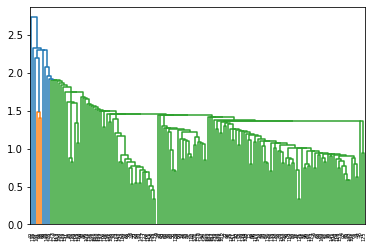

In [273]:
Single_Linkage = linkage(df1, method="single", metric='euclidean')
dendrogram(Single_Linkage)
plt.show()

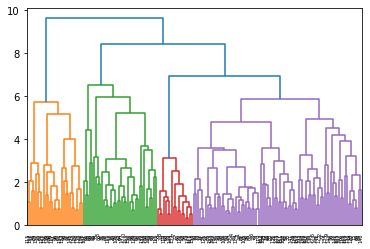

In [274]:
complete_Linkage = linkage(df1, method="complete", metric='euclidean')
dendrogram(complete_Linkage)
plt.show()

## By checking two kinds of linkages we conclude that Complete linkage will be more convenient for clustering 

In [275]:
# Looking at dendrogram of hierarchical clustering there seem to be 4 clusters.

In [276]:
cluster_labels = cut_tree(complete_Linkage, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 3, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 3,
       2, 1, 1, 1, 1, 0, 1, 3, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 0, 0, 3, 1, 1, 1, 1, 0,
       0, 3, 3, 3, 1, 0, 0, 3, 3, 0, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       3, 2, 0, 0, 2, 3, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 3, 0, 1, 3,
       0, 3, 3, 3, 1, 1, 3, 2, 1, 1, 1, 1, 2, 3, 1, 0, 3, 0, 0, 1, 1, 1,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 0])

In [277]:
df_hm = pd.concat([ngo_df, pd.Series(cluster_labels)], axis = 1)
df_hm.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
df_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


In [278]:
df_hm['cluster_labels'].value_counts()

1    84
0    37
3    28
2    18
Name: cluster_labels, dtype: int64

## Now we will analyse how 

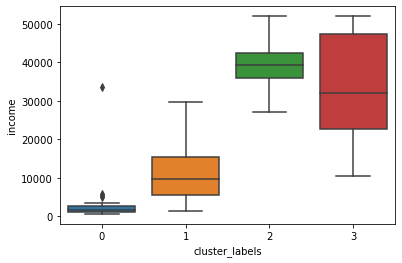

In [279]:
sns.boxplot(data=df_hm,x = 'cluster_labels',y='income')
plt.show()

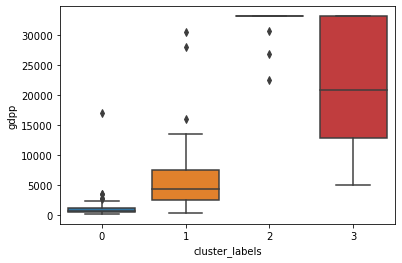

In [280]:
sns.boxplot(data=df_hm,x = 'cluster_labels',y='gdpp')
plt.show()

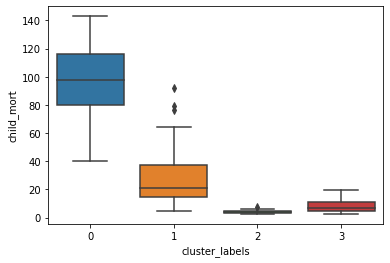

In [281]:
sns.boxplot(data=df_hm,x = 'cluster_labels',y='child_mort')
plt.show()

## From above visualisation we can conclude that cluster 0 has very low income and GDPP growth and high in child mortality , So we can conclude that we should focus more on countries coming under cluster0

In [282]:
df_hm[df_hm['cluster_labels']==0]['country']


0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
101       Micronesia, Fed. Sts.
106                  Mozambique
112                       Niger
113                     Nigeria
129                     Senegal
132     

In [283]:
top_h = df_hm[df_hm['cluster_labels']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]) 
top_h = top_h.reset_index().drop('index',1)
top_h.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Sierra Leone,142.875,16.8,13.10,34.5,1220.0,17.20,55.00,5.2000,399.0,0
1,Central African Republic,142.875,11.8,3.98,26.5,888.0,2.01,48.05,5.2100,446.0,0
2,Haiti,142.875,15.3,6.91,64.7,1500.0,5.45,48.05,3.3300,662.0,0
3,Chad,142.875,36.8,4.53,43.5,1930.0,6.39,56.50,6.5900,897.0,0
4,Mali,137.000,22.8,4.98,35.1,1870.0,4.37,59.50,6.5500,708.0,0
5,Nigeria,130.000,25.3,5.07,17.4,5150.0,24.16,60.50,5.8400,2330.0,0
6,Niger,123.000,22.2,5.16,49.1,814.0,2.55,58.80,7.0075,348.0,0
7,Angola,119.000,62.3,2.85,42.9,5900.0,22.40,60.10,6.1600,3530.0,0
8,"Congo, Dem. Rep.",116.000,41.1,7.91,49.6,609.0,20.80,57.50,6.5400,334.0,0
9,Burkina Faso,116.000,19.2,6.74,29.6,1430.0,6.81,57.90,5.8700,575.0,0


In [284]:
top_10 = top_h.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


# From above result we can conclude that abobe 10 Countries should be focused by NGO . 
# K mean method and Hierarchical clustering Method Gives same Result 